In [15]:
from classy import Class
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def calculate_phi_start_BI(mu,M4,n,precision):
    return(mu*pow(M4/precision,1/n))


def calculate_phi_end_BI(mu,M4,n,precision):
    return(mu*pow(precision/(M4-precision),n))

In [17]:
eta = 1e-80

    #Masse de Planck réduite
from math import pi
csteGrav = 6.6743015e-11
M_pl = 8*pi*csteGrav

    # Parametrization of the potential
n=4
liste_mu = M_pl*np.logspace(-3,3,7)

for mu in liste_mu:
    M4=4*pi*pi*pow(mu,4)*16/27
    print("mu",mu)
    print("environ 0")
    print("debut",calculate_phi_end_BI(mu,M4,n,eta))
    print("environ infini")
    print("fin",calculate_phi_start_BI(mu,M4,n,eta))
    print()

mu 1.6774349248194669e-12
environ 0
debut 1.425118457553104e-149
environ infini
fin 0.0006188285625284403

mu 1.6774349248194668e-11
environ 0
debut 1.4251184575531035e-164
environ infini
fin 0.06188285625284403

mu 1.6774349248194668e-10
environ 0
debut 1.4251184575531039e-179
environ infini
fin 6.1882856252844025

mu 1.6774349248194668e-09
environ 0
debut 1.4251184575531035e-194
environ infini
fin 618.8285625284403

mu 1.6774349248194667e-08
environ 0
debut 1.4251184575531057e-209
environ infini
fin 61882.856252844016

mu 1.6774349248194667e-07
environ 0
debut 1.425118457553106e-224
environ infini
fin 6188285.625284401

mu 1.6774349248194668e-06
environ 0
debut 1.4251184575531044e-239
environ infini
fin 618828562.5284402



In [18]:
#### -------  Setting up the parameters  -------  #####

#We run several simulations, stocked in this list
cosmo=[]


# 0th - Analytical one (we just give the parameters for the power spectra that we know from observations)

cosmo += [Class()]
cosmo[0].set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'r':1, 'k_pivot':0.05})
cosmo[0].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[0].set({'modes':'s,t'})   
cosmo[0].set({'Pk_ini_type':'analytic_Pk'}) 

## 1st - We calculate perturbatively with the module inflation_V_end
# phi_end : cf. the calculation on the Overleaf
    # phi_end = mu * M^4.eta / (1 + M^4.eta)     où  eta  est la précision
    #    
# full_potential :  brane_inflation (the one I implemented)
# parameters of the potential :  explained in  primordial_inflation_potential

        ## V(phi) = M^4 * 1/ (1 + (phi/mu)^-n )
            ##  où  n=4                         fixed
            ##      mu/M_p \in  [1e-3,1e3]  not fixed
            ##      M^4/mu^4 = v = 16/27        fixed

## Careful !! Here the potential is increasing, so phi should go from +infinity to 0
## To have an increasing field phi, we should consider V'(phi)=V(phi_end-phi)

eta = 1e-100

    #Masse de Planck réduite
from math import pi
csteGrav = 6.6743015e-11
M_pl = 1/np.sqrt(8*pi*csteGrav)

    # Parametrization of the potential
n=4
mu=1e-6
M4=4*pi*pi*pow(mu,4)*16/27


cosmo += [Class() ]
cosmo[1].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[1].set({'modes':'s,t'})   
cosmo[1].set({'Pk_ini_type':'inflation_V_end'})  
cosmo[1].set({'full_potential':'brane_inflation'})
cosmo[1].set({'phi_end':calculate_phi_end_BI(mu,M4,n,eta)})
cosmo[1].set({'Vparam0':M4,'Vparam1':mu,'Vparam2':n,'Vparam3':calculate_phi_start_BI(mu,M4,n,eta),'Vparam4':0.})  



# cosmo += [Class() ]
# cosmo[1].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# cosmo[1].set({'modes':'s,t'})   
# cosmo[1].set({'Pk_ini_type':'inflation_V_end'})  
# cosmo[1].set({'full_potential':'brane_inflation'})
# cosmo[1].set({'phi_end':calculate_phi_start_BI(mu,M4,n,eta)})
# cosmo[1].set({'Vparam0':M4,'Vparam1':mu,'Vparam2':n,'Vparam3':0.,'Vparam4':0.})  

True

In [19]:
## General parameters
l_max_scalars= 2500
l_max_tensors = 600

In [20]:
for x in cosmo:
    x.compute()
primo = [ x.get_primordial() for x in cosmo]

CosmoComputationError: 

Error in Class: primordial_init(L:370) :error in primordial_inflation_solve_inflation(ppt,ppm,ppr);
=>primordial_inflation_solve_inflation(L:1486) :error in primordial_inflation_spectra(ppt, ppm, ppr, y_ini);
=>primordial_inflation_spectra(L:1703) :error in primordial_inflation_one_wavenumber(ppt,ppm,ppr,y_ini,index_k);
=>primordial_inflation_one_wavenumber(L:1787) :error in primordial_inflation_one_k(ppm, ppr, k, y, dy, &curvature, &tensors);
=>primordial_inflation_one_k(L:1910) :condition (dtau/tau_start < ppr->smallest_allowed_variation) is true; integration step: relative change in time =2.206883e-16 < machine precision : leads either to numerical error or infinite loop

In [ ]:
###### ----- Extracting valuable data  (k, power spectra Ps(k), ...  correlation function in harmonic   Cl, ClT, ... ) ---- #####

N=len(primo)

kk = [ primo[i]['k [1/Mpc]'] for i in range(N)]

P_s= [ primo[i]['P_scalar(k)'] for i in range(N) ]
P_t= [ primo[i]['P_tensor(k)'] for i in range(N) ]

#cls = [ cosmo[i].raw_cl(l_max_tensors) for i in range(N) ]
cls = [cosmo[i].lensed_cl(2500) for i in range(N)]
ll = [cls[i]['ell'][2:] for i in range(N)]
clTT = [cls[i]['tt'][2:] for i in range(N)]
clEE = [cls[i]['ee'][2:] for i in range(N)]
clPP = [cls[i]['pp'][2:] for i in range(N)]

h = [ cosmo[i].h() for i in range(N) ] # get reduced Hubble for conversions to 1/Mpc




In [ ]:
#Colors ( for the plotting blabla)
C=['magenta','cyan']

# Number of cosmological models
N = len(cosmo) 
print(N)

l_label= [["Analytical",""]]
style = [ '--' ]


l_label.append(['inflation_V_end',f'mu = {mu}'])
style.append('-')



2


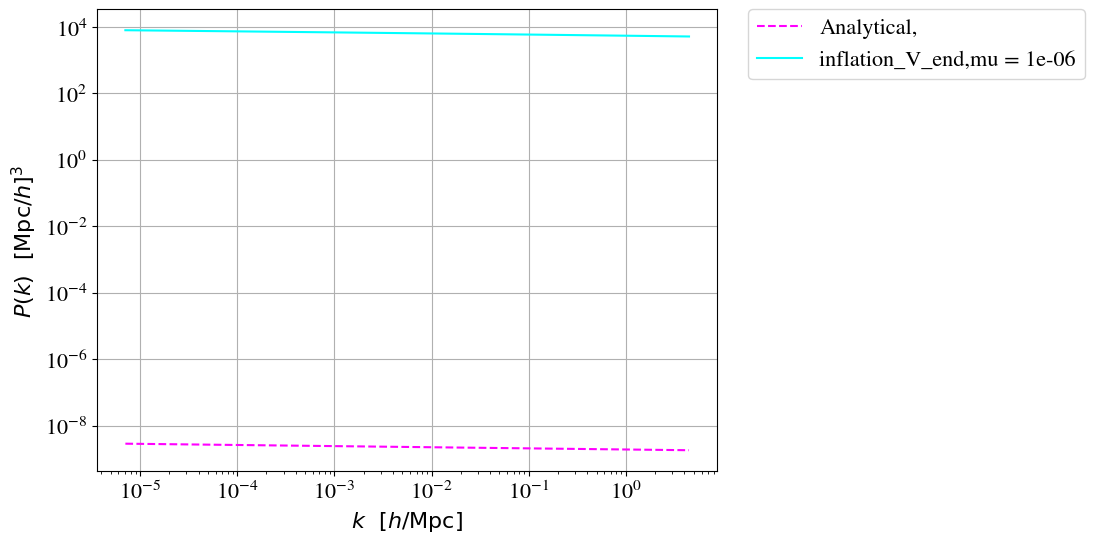

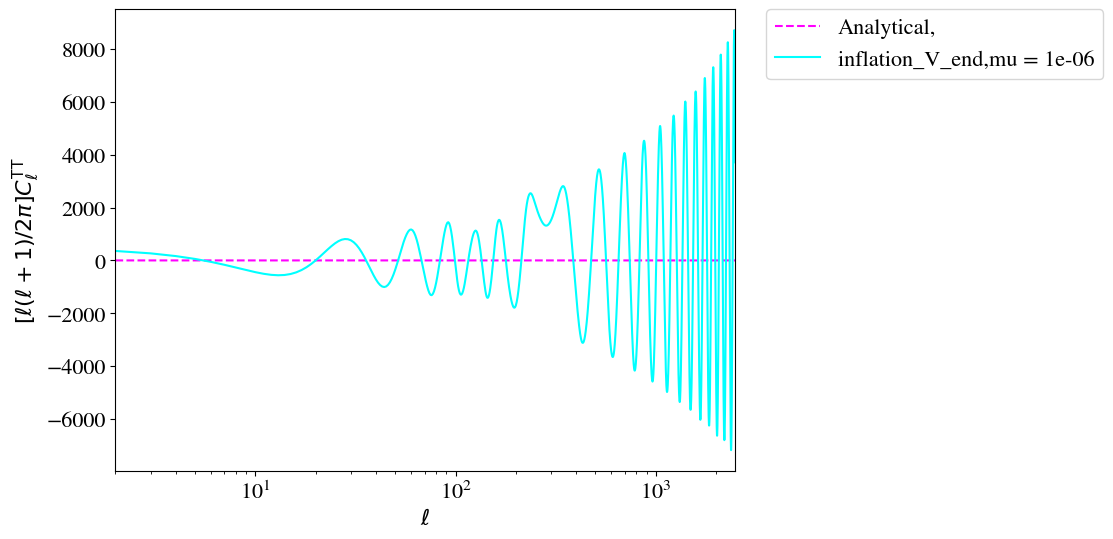

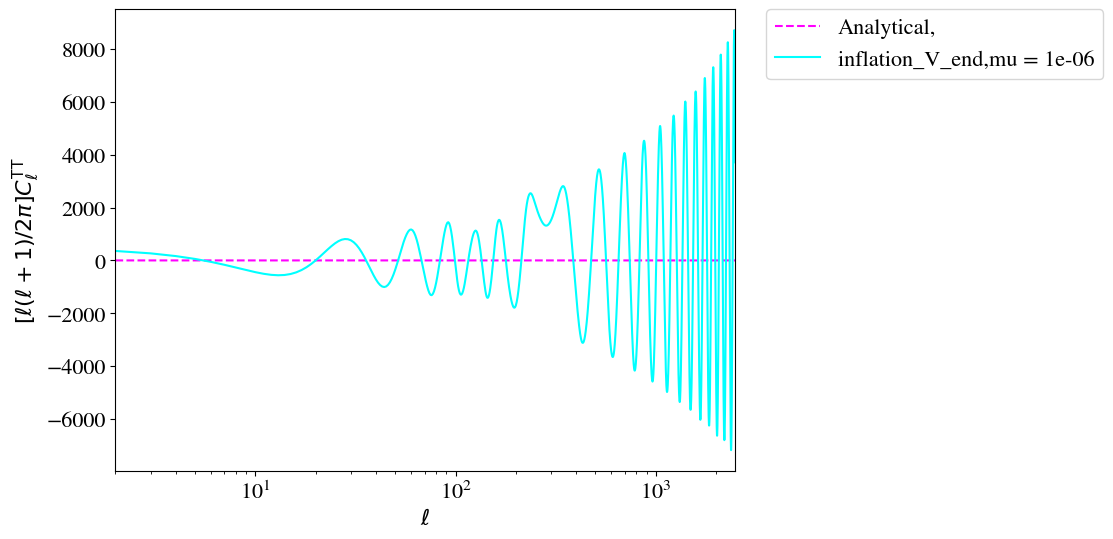

In [ ]:
##### --------- Plotting ------- #####
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]



# Power spectrum scalar

for i in range(N):
    for k in kk[i]:
        P_s.append( primo[i]['P_scalar(k)'])
        P_t.append(primo[i]['P_tensor(k)'])


    plt.loglog(kk[i],P_s[i],color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    

plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title(r"")

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# plot C_l^TT
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(N):
    plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# plot C_l^TT
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(N):
    plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()